In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
#Load the Dataset
d = pd.read_csv("D:/skillcraft_technology/House_price.csv")

In [3]:
d

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850,sqft,4200.00,sqft,98119,1175000
1,4,5.0,3040,sqft,5002.00,sqft,98106,1057500
2,3,1.0,1290,sqft,6048.00,sqft,98125,799000
3,3,2.0,2360,sqft,0.28,acre,98188,565000
4,3,3.5,1942,sqft,1603.00,sqft,98107,1187000
...,...,...,...,...,...,...,...,...
500,5,4.5,5580,sqft,0.30,acre,98146,3800000
501,3,2.5,1390,sqft,1570.00,sqft,98126,575000
502,3,2.5,2950,sqft,0.47,acre,98118,3105000
503,5,5.0,3010,sqft,4887.00,sqft,98115,1807000


In [6]:
# Display summary statistics
d.describe()

,beds,baths,size,lot_size,zip_code,price
count,505.000000,505.000000,505.000000,428.000000,505.000000,5.050000e+02
mean,2.954455,2.219802,1851.843564,3994.459813,98125.366337,9.795822e+05
std,1.214947,1.013404,922.556090,2696.962024,24.875054,6.084759e+05
min,1.000000,1.000000,376.000000,0.230000,98101.000000,1.700000e+05
25%,2.000000,1.500000,1171.000000,1326.500000,98108.000000,6.199900e+05
50%,3.000000,2.000000,1690.000000,4190.000000,98118.000000,8.400000e+05
75%,4.000000,2.500000,2400.000000,6000.000000,98126.000000,1.155000e+06
max,9.000000,7.000000,6139.000000,9974.000000,98199.000000,6.250000e+06


In [7]:
# Display the first few rows
d.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850,sqft,4200.00,sqft,98119,1175000
1,4,5.0,3040,sqft,5002.00,sqft,98106,1057500
2,3,1.0,1290,sqft,6048.00,sqft,98125,799000
3,3,2.0,2360,sqft,0.28,acre,98188,565000
4,3,3.5,1942,sqft,1603.00,sqft,98107,1187000


In [8]:
# Check for missing values
d.isnull().sum()

beds               0
baths              0
size               0
size_units         0
lot_size          77
lot_size_units    77
zip_code           0
price              0
dtype: int64

In [22]:
d['lot_size_units'].unique()

array(['sqft', 'acre', 'unknown'], dtype=object)

In [19]:
d['lot_size_units'].fillna(d['lot_size_units'].mode()[0], inplace=True)

In [20]:
d['lot_size_units'].fillna("unknown", inplace=True)

In [21]:
d.isnull().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

In [23]:
# Set random seed for reproducibility
train, test = train_test_split(d, test_size=0.2, random_state=123)

In [24]:
# Define features and target
X_train = train[['beds', 'baths', 'size', 'lot_size']]
y_train = train['price']
X_test = test[['beds', 'baths', 'size', 'lot_size']]
y_test = test['price']

In [25]:
# Initialize the model
model = LinearRegression()

In [27]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
display(coef_df)
print("Intercept:", model.intercept_)

,Feature,Coefficient
0,beds,-97275.863690
1,baths,114031.242867
2,size,499.945608
3,lot_size,-25.378411


Intercept: 186432.92913777474


In [28]:
# Predict house prices using the test dataset
pred = model.predict(X_test)

In [29]:
# Create a comparison DataFrame
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
comparison['Error'] = comparison['Actual'] - comparison['Predicted']
display(comparison.head())

,Actual,Predicted,Error
372,1560000,1.189484e+06,370516.326905
310,675000,7.341669e+05,-59166.934640
444,655000,1.015733e+06,-360733.456910
421,1625000,1.451277e+06,173723.077485
429,1425000,8.339581e+05,591041.889114


In [30]:
# Calculate RMSE (Root Mean Square Error)
rmse = np.sqrt(mean_squared_error(y_test, pred))
print(rmse)

322795.0719925951


In [31]:
# Calculate R² Score
r2 = r2_score(y_test, pred)
print(r2)

0.7018810423634871


Text(0, 0.5, 'Predicted Price')

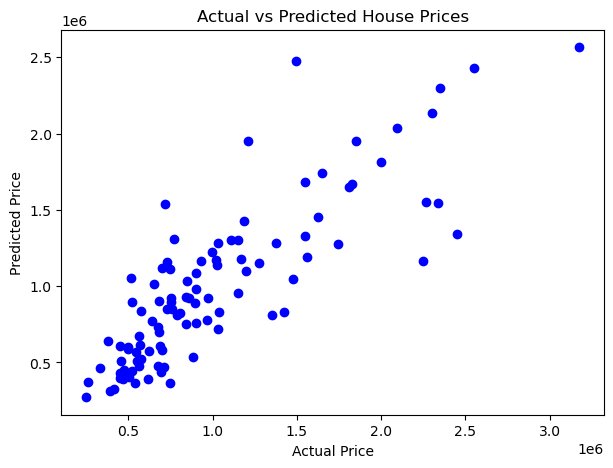

In [32]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, pred, color='blue')
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

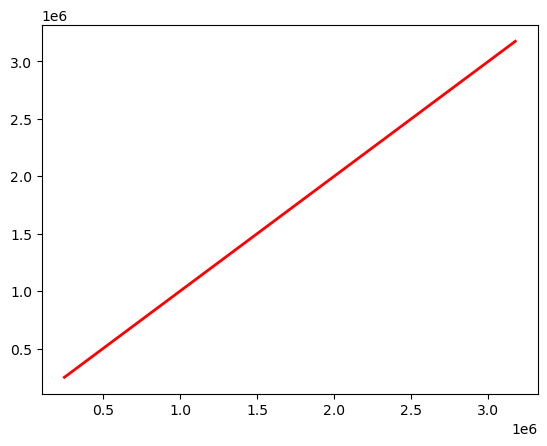

In [33]:
# Ideal line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()

In [34]:
# New house details
new_house = pd.DataFrame({'beds': [3], 'baths': [2], 'size': [1800], 'lot_size': [5000]})

In [35]:
# Predict the price
predicted_price = model.predict(new_house)
print("Predicted Price for New House:", predicted_price[0])

Predicted Price for New House: 895677.8616036489
